## Robustness test for our baseline model

- This Jupyter notebook reports the results of robustness checks conducted on the baseline model of our framework.

- In this Jupyter notebook, we examined whether pecuniary externality arises by varying $\sigma$ and $\alpha_1$ (and $\alpha_2$) in the baseline model calibrated to U.S. data. Specifically, we compared the welfare outcomes of the baseline economy (perfectly competitive banking + BJ) and the HLMW economy (no-bank economy).

* Comparision: $DW:= W_{Baseline} - W_{HLMW}$
    * Welfare in our baseline economy: Price dispersion + perfectly competitive banks 
    * Welfare in HLMW economy: Price dispersion
    * Robustness test.1: Vary $\sigma$
    * Robustness test.2: Vary $\alpha_{1}$

- Main result: The robustness analysis indicates that the results remain consistent even when the DM risk aversion parameter $\sigma$ and the search intensity parameters $\alpha_1$ and $\alpha_2$ are adjusted.

In [1]:
import bcw_bj as main
import hlmw as hlmw
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import interpolate
from scipy.optimize import brentq, fsolve
#import tikzplotlib
import time

In [2]:
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
font = {'family' : 'serif','weight':'normal',
        'size'   : 10}
plt.rc('font', **font)

- As shown in Appendix C, the parameters based on the calibration results are as follows.

In [3]:
σ_DM=0.3200
Ubar_CM=1.8000
n=0.65
α_1=0.0475
β=0.981
τ_min=β-1
τ_max = 0.05
τgrid_size = 30

In [4]:
# Baseline
model = main.baseline_mod(β=β,σ_DM=σ_DM, Ubar_CM=Ubar_CM, n=n,τ_max = τ_max,α_1=α_1,τgrid_size = τgrid_size,τ_min=τ_min)
model_2 = main.baseline_mod(β=β,σ_DM=0.5, Ubar_CM=Ubar_CM, n=n,τ_max = τ_max,α_1=α_1,τgrid_size = τgrid_size,τ_min=τ_min)
model_3 = main.baseline_mod(β=β,σ_DM=0.6, Ubar_CM=Ubar_CM, n=n,τ_max = τ_max,α_1=α_1,τgrid_size = τgrid_size,τ_min=τ_min)
model_4 = main.baseline_mod(β=β,σ_DM=σ_DM, Ubar_CM=Ubar_CM, n=n,τ_max = τ_max,α_1=0.1,τgrid_size = τgrid_size,τ_min=τ_min)
model_5 = main.baseline_mod(β=β,σ_DM=σ_DM, Ubar_CM=Ubar_CM, n=n,τ_max = τ_max,α_1=0.15,τgrid_size = τgrid_size,τ_min=τ_min)

# HLMW
model_hlmw =hlmw.hlmw_mod(β=β,σ_DM=σ_DM, Ubar_CM=Ubar_CM, n=n,τ_max = τ_max,α_1=α_1,τgrid_size = τgrid_size,τ_min=τ_min)
model_hlmw_2 =hlmw.hlmw_mod(β=β,σ_DM=0.5, Ubar_CM=Ubar_CM, n=n,τ_max = τ_max,α_1=α_1,τgrid_size = τgrid_size,τ_min=τ_min)
model_hlmw_3 =hlmw.hlmw_mod(β=β,σ_DM=0.6, Ubar_CM=Ubar_CM, n=n,τ_max = τ_max,α_1=α_1,τgrid_size = τgrid_size,τ_min=τ_min)
model_hlmw_4 =hlmw.hlmw_mod(β=β,σ_DM=σ_DM, Ubar_CM=Ubar_CM, n=n,τ_max = τ_max,α_1=0.1,τgrid_size = τgrid_size,τ_min=τ_min)
model_hlmw_5 =hlmw.hlmw_mod(β=β,σ_DM=σ_DM, Ubar_CM=Ubar_CM, n=n,τ_max = τ_max,α_1=0.15,τgrid_size = τgrid_size,τ_min=τ_min)

### SME: HLMW + perfectly competitive banks (Baseline)

* Vary $\tau \in [\beta-1, 0.1]$

In [5]:
# Baseline - result
z_guess = 0.7
i_guess = 0.01
result = model.SME_stat(z_guess, i_guess) 
result_2 = model_2.SME_stat(z_guess, i_guess) 
result_3 = model_3.SME_stat(z_guess, i_guess) 
result_4 = model_4.SME_stat(z_guess, i_guess) 
result_5 = model_5.SME_stat(z_guess, i_guess) 

Elapsed time of solving SME: 45.201374769210815 seconds
Elapsed time of solving SME: 46.20091128349304 seconds
Elapsed time of solving SME: 45.12600755691528 seconds
Elapsed time of solving SME: 46.11294198036194 seconds
Elapsed time of solving SME: 46.2621374130249 seconds


In [6]:
W = result['allocation_grid']['w_star']
W_2 = result_2['allocation_grid']['w_star']
W_3 = result_3['allocation_grid']['w_star']
W_4 = result_4['allocation_grid']['w_star']
W_5 = result_5['allocation_grid']['w_star']

### HLMW: without banks

In [7]:
# HLMW - result
result_hlmw = model_hlmw.SME_stat() 
result_hlmw_2 = model_hlmw_2.SME_stat() 
result_hlmw_3 = model_hlmw_3.SME_stat() 
result_hlmw_4 = model_hlmw_4.SME_stat() 
result_hlmw_5 = model_hlmw_5.SME_stat() 

Elapsed time of solving SME: 30.83343005180359 seconds
Elapsed time of solving SME: 32.50213003158569 seconds
Elapsed time of solving SME: 35.76944971084595 seconds
Elapsed time of solving SME: 37.79318046569824 seconds
Elapsed time of solving SME: 37.75461935997009 seconds


In [8]:
W_hlmw = result_hlmw['allocation_grid']['w_star']
W_hlmw_2 = result_hlmw_2['allocation_grid']['w_star']
W_hlmw_3 = result_hlmw_3['allocation_grid']['w_star']
W_hlmw_4 = result_hlmw_4['allocation_grid']['w_star']
W_hlmw_5 = result_hlmw_5['allocation_grid']['w_star']

In [9]:
τ_grid = model.τ_grid # inflation rate grid
i_grid = model.i_policy(τ_grid)

## Robust results. 1: varing $\sigma$ given $\alpha_1$
- The first result shows that even when sigma is varied while alpha_1 is fixed, welfare decreases in the low-inflation range. This demonstrates the robustness of our findings.

In [10]:
DW = W - W_hlmw 
DW_2 = W_2 - W_hlmw_2 
DW_3 = W_3 - W_hlmw_3 

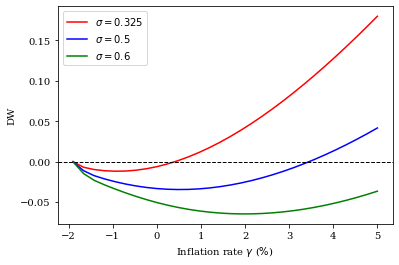

In [11]:
plt.figure(facecolor='white')
plt.plot(100*(model.τ_grid), DW, label=r'$\sigma=0.325$',color='r')
plt.plot(100*(model.τ_grid), DW_2, label=r'$\sigma=0.5$',color='b')
plt.plot(100*(model.τ_grid), DW_3, label=r'$\sigma=0.6$',color='g')
plt.axhline(y=0,color="black", linestyle='--',linewidth=1.0)
plt.ylabel("DW")
plt.xlabel(r'Inflation rate $\gamma$ ($\%$)')
plt.legend()
plt.show()

## Robust results. 2: varing $\alpha_1$ given $\sigma$
- The first result shows that even when $\alpha_1$ is varied while $\sigma$ is fixed, welfare decreases in the low-inflation range. This demonstrates the robustness of our findings.

In [12]:
DW = W - W_hlmw 
DW_4 = W_4 - W_hlmw_4 
DW_5 = W_5 - W_hlmw_5

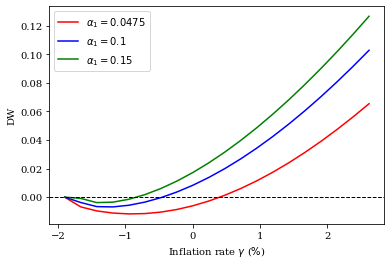

In [13]:
plt.figure(facecolor='white')
plt.plot(100*(model.τ_grid[0:20]), DW[0:20], label=r'$\alpha_1=0.0475$',color='r')
plt.plot(100*(model.τ_grid[0:20]), DW_4[0:20], label=r'$\alpha_1=0.1$',color='b')
plt.plot(100*(model.τ_grid[0:20]), DW_5[0:20], label=r'$\alpha_1=0.15$',color='g')
plt.axhline(y=0,color="black", linestyle='--',linewidth=1.0)
plt.ylabel("DW")
plt.xlabel(r'Inflation rate $\gamma$ ($\%$)')
plt.legend()
plt.show()